# Logistic Regression with non-linear features

## Assignment Explanation   
이중 분류를 하는 것이 과제이며, 특별히 이번 과제에서는 logistic regression이 linear 함수가 아닌 feature function을 통해 non linear한 classifier 구현이 목표이다. 본 과제에서는 데이터 셋이 2개이다. 2차원 평면 상의 포인트로 데이터가 주어지며, 각 포인트마다 레이블이 설정되어 있다. 이번 과제에서는 비선형 형식으로 주어진 데이터들에 대해 데이터를 가장 잘 구분하는 classifier를 구하는 것이 본 과제의 목표이다. 데이터 셋은 x, y, label로 구성되어 있다.   
학습 데이터는 2차원 공간 상의 포인트와 그것의 레이블로 구성되어 있다. x,y 좌표는 2차원 벡터를 구성하며 label은 0,1의 값을 갖게 된다. 이번 과제에서는 x,y에 대해 커널 함수를 정의해야 한다. x, y가 주어졌을 때 이전의 linear classifier의 경우는 linear regression 정의 했었다. 그러나 이번에는 x, y가 주어지면 이전과 theta0 + theta1 * k1(x, y) + theta2 * k2(x, y) + ... + thetap-1 * kp-1 (x, y). 모델 파라미터 theta, 커널 function k (x, y point를 characterize 하는 feature function과의 linear combination 통해서) linear regression func 만들게 된다. theta를 통해 정의하는데, 모델 파라미터의 차원은 우리가 정하는 것. 정의하는 feature에 따라 모델 파라미터 수가 정해지고 임의의 수만큼 모델 파라미터를 사용할 수 있다. 그것에 따라서 모델 파라미터의 차원과 동일하게 feature func의 차원도 모델 파라미터의 차원과 동일하게 정의하면 된다. 여기서 P를 정의해야. feature func 또한. P개의 함수를 사용한다면, 모델 파라미터도 P차원이 되며, feature func도 P개. feature function을 classify 잘할 수 있도록 디자인 해야 한다.

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2] # 1번째 데이터
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2] # 2번째 데이터
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

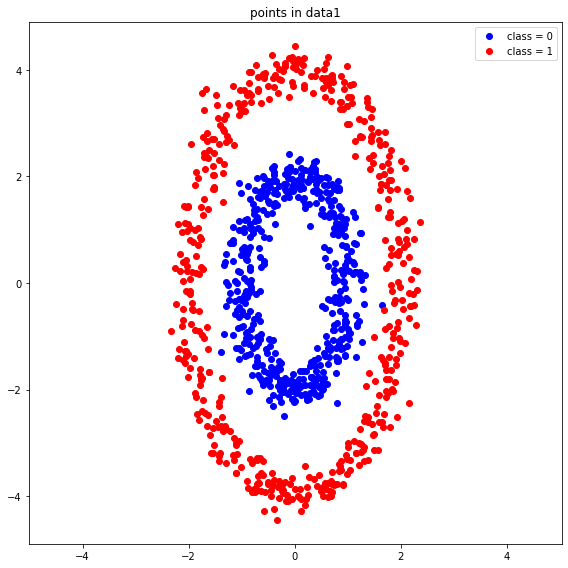

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

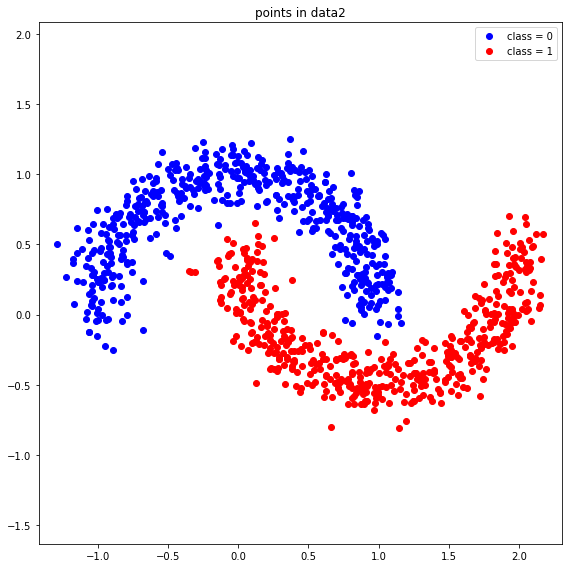

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$   
- 첫 번째 데이터 분류기 정의, 각 포인트에 대해서 그것의 feature function 정의, 즉, 데이터가 input으로 들어왔을 때, 그것의 feature function 정의하기   
- 두 번째 데이터 셋에도 똑같이 정의하기   
- 각 포인트에 대해 feature 벡터를 정의하고, point는 모든 포인트가 들어오는 것인데 모든 포인트에 대한 feature vector 정의해서 출력하기

In [14]:
def compute_feature1(point): # input data_1 point

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    feature = np.column_stack((np.ones(len(data1_point_x)), data1_point_x, data1_point_y, data1_point_x**2, data1_point_y**2))
    # np.column_stack((np.ones(len(data1_point_x)), data1_point_x, data1_point_y, data1_point_x**2, data1_point_x * data1_point_y, data1_point_y**2))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

In [4]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    feature = np.column_stack((np.ones(len(data2_point_x)),  data2_point_x * data2_point_y, data2_point_x**2, data2_point_x * data2_point_y**2, data2_point_x **3, data2_point_y**3))
    # data2_point_y
    # data2_point_x, data2_point_y,
    # np.column_stack((np.ones(len(data2_point_x)),  data2_point_x * data2_point_y, data2_point_x**2, data2_point_x**2 * data2_point_y, data2_point_x **3, data2_point_y**3)) (best)
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [5]:
def compute_linear_regression(theta, feature): # inner product

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = np.dot(feature, theta.T) 
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [6]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = 1 / (1 + np.exp(-z))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [7]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [8]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    h = compute_logistic_regression(theta, feature) 
    residual = - label * np.log(h) - (1 - label) * np.log(1 - h)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [9]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    loss = (1 / feature.shape[0]) * np.sum(compute_residual(theta, feature, label))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [10]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h = compute_logistic_regression(theta, feature)
    # 로스에 대한 파라미터의 gradient 구하고 descent 통해 최적화
    gradient =  (1 / feature.shape[0]) * np.dot(feature.T , (h - label)) 

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [11]:
def compute_accuracy(theta, feature, label): # correct / # point

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    predictions = []
    for prob in compute_logistic_regression(theta, feature):
        if prob >= 0.5 :
            predictions.append(1)
        else:
            predictions.append(0)
    
    N = label.shape[0]
    accuracy = np.sum((label == predictions)) / N

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

전체 포인트의 수에서 정확하게 분류기가 구분한 포인트의 수로 정의한다. 모든 포인트에 대해 정의한다면 그 때 accuracy 1. 현재 theta, feature에 대해 얻어진 accuracy 계산하기

## initialize the gradient descent algorithm

In [15]:
data1_number_iteration   = 30000 # iteration 수 조정해서 가장 높은 정확도, 낮은 로스를 얻도록 값을 변화시키기, 현 값은 예시(100), iteration 임의로 정하기
# 20000 정도에서 loss 변화 없는 것 확인
data2_number_iteration   = 50000

data1_learning_rate   = 0.1 
data2_learning_rate   = 0.3 

data1_number_feature    = 5 # feature 함수의 수
data2_number_feature    = 6 

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

셋 다 임의로 조정하기

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [16]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    feature1 = compute_feature1(data1_point)
    theta1      = theta1 - data1_learning_rate * compute_gradient(theta1, feature1, data1_label)
    loss1       = compute_loss(theta1, feature1, data1_label)
    accuracy1   = compute_accuracy(theta1, feature1, data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

In [17]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    feature2 = compute_feature2(data2_point)
    theta2      = theta2 - data2_learning_rate * compute_gradient(theta2, feature2, data2_label)
    loss2      = compute_loss(theta2, feature2, data2_label)
    accuracy2   = compute_accuracy(theta2, feature2, data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

In [18]:
data2_loss_iteration

array([0.65000714, 0.62396659, 0.60670132, ..., 0.02105149, 0.02105126,
       0.02105102])

___

___

## functions for presenting the results

___

___

In [19]:
def function_result_01(): # 데이터 1의 분류기에 대한 최종 로스값

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [20]:
function_result_01()

# 0.1429281926 iter 20000 learning rate 0.001 3 theta
# 0.0319885193 iter 20000 learning rate 0.01 3 theta
# 0.0239031402 iter 30000 learning rate 0.01 3 theta
# 0.0239018744 iter 30000 learning rate 0.01 5 theta
# 0.0070969284 iter 30000 learning rate 0.1 5 theta

final loss for data1 =  0.0070969284


In [21]:
def function_result_02(): # 데이터 2의 분류기에 대한 최종 로스, iteration 최종의 로스

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [22]:
function_result_02()

# 0.2893153712 iter 30000 learning rate 0.01 3 theta
# 0.2198213473 iter 30000 learning rate 0.01 5 theta
# 0.2158828343 iter 30000 learning rate 0.01 6 theta
# 0.0952822036 iter 30000 learning rate 0.01 7 theta
# 0.0660592467 iter 30000 learning rate 0.1 7 theta
# 0.0300883786 iter 30000 learning rate 0.1 6 theta (y^3)
# 0.0312513563 iter 30000 learning rate 0.1 6 theta (no y)
# 0.0239259923 iter 50000 learning rate 0.1 6 theta (y^3)
# 0.0614641312 iter 50000 learning rate 0.1 5 theta (no y)
# 0.0214651821 iter 50000 learning rate 0.1 7 theta (x*y)
# 0.0210510213 iter 50000 learning rate 0.1 6 theta

final loss for data2 =  0.0210510213


https://www.youtube.com/watch?v=F_VG4LNjZZw&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=34

In [23]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [24]:
function_result_03()

final accuracy for data1 =  0.9990000000


In [25]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [26]:
function_result_04()

final accuracy for data2 =  0.9980000000


In [27]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

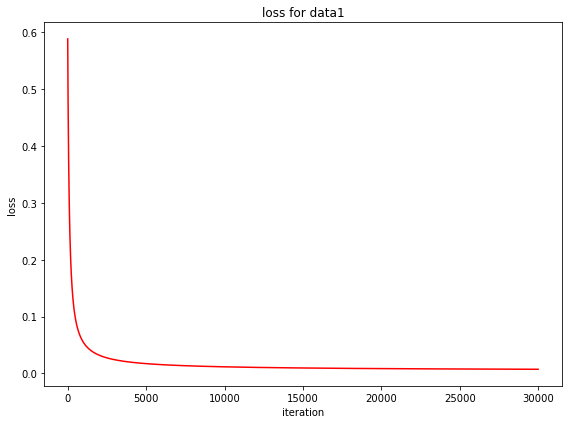

In [28]:
function_result_05()

In [29]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

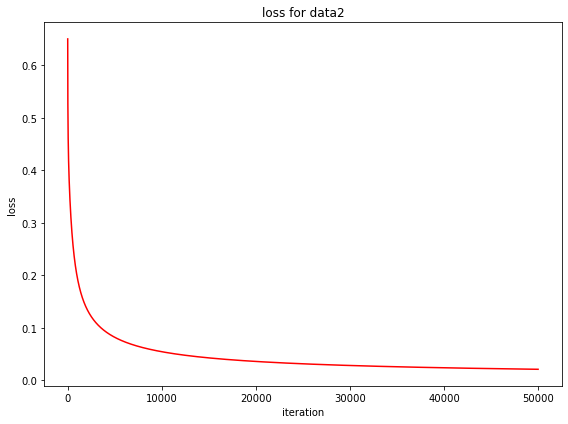

In [30]:
function_result_06()

In [31]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

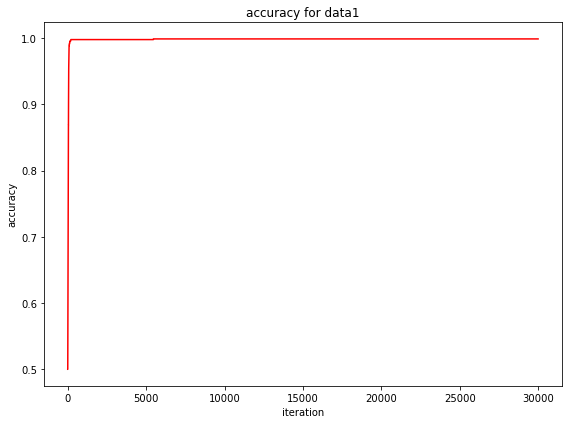

In [32]:
function_result_07()

In [33]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

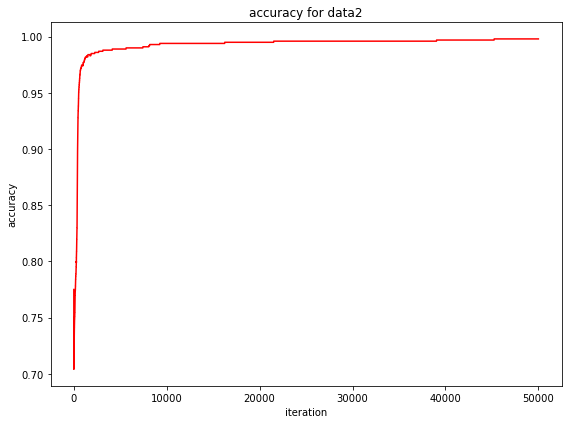

In [34]:
function_result_08()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

https://jermwatt.github.io/machine_learning_refined/notes/10_Nonlinear_intro/10_2_Regression.html   
https://xplordat.com/2019/03/13/logistic-regression-as-a-nonlinear-classifier/

In [35]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    ZZ = theta1[0] + theta1[1] * XX + theta1[2] * YY + theta1[3] * XX**2 + theta1[4] * YY **2
    #theta1[0] + theta1[1] * XX **2 + theta1[2] * YY**2
    #theta1[0] + theta1[1] * XX + theta1[2] * YY + theta1[3] * XX**2 + theta1[4] * XX * YY + theta1[5] * YY**2

    # ZZ[, ZZ[:-1, :-1].max()
    levels = ticker.MaxNLocator(nbins =100).tick_values(ZZ.min(), ZZ.max())
    #plt.pcolormesh(XX, YY, ZZ, cmap = plt.cm.RdBu_r, norm=norm)
    
    plt.contourf(XX, YY, ZZ, cmap = plt.cm.RdBu_r, levels=levels) # 색상 표시
    plt.colorbar()

    plt.plot(data1_point_x_class_0, data1_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, '.', color='red', label='class = 1')

    #compute_feature1
    zero = plt.contour(XX, YY, ZZ, levels = 0, colors='k') # 등고선만 표시
    #plt.plot(X, zero, color = 'k')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    #plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

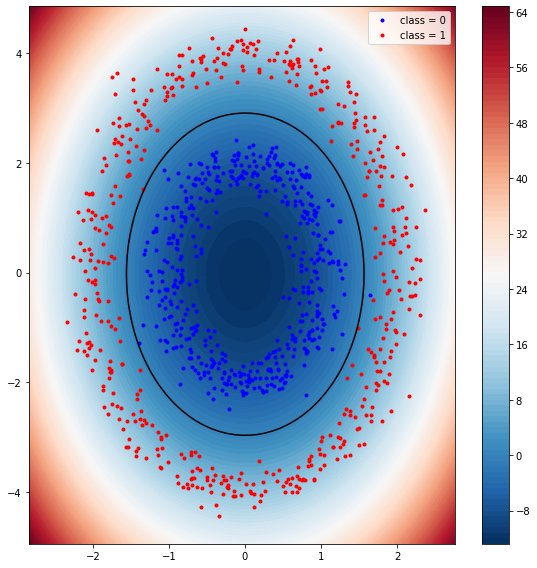

In [36]:
function_result_09()

np.ones(len(data2_point_x)),  data2_point_x * data2_point_y, data2_point_x**2, data2_point_x**2 * data2_point_y, data2_point_x **3, data2_point_y**3))

In [46]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    ZZ = theta2[0] + theta2[1] * XX * YY + theta2[2] * XX**2 + theta2[3] * XX * YY **2 + theta2[4] *XX**3 + theta2[5] * YY**3
    #theta2[0] + theta2[1] * XX * YY + theta2[2] * XX**2 + theta2[3] * XX**2 * YY + theta2[4] *XX**3 + theta2[5] * YY**3
    # recent : theta2[0] + theta2[1] * XX + theta2[2] * YY + theta2[3] * XX*YY + theta2[4] *XX**2 + theta2[5] * XX**3 + theta2[6] * YY**3
    #theta2[0] + theta2[1] * XX + theta2[2] * YY + theta2[3] * XX**2 + theta2[4] * XX**3 + theta2[5] * YY**3
    #theta2[0] + theta2[1] * XX + theta2[2] * YY + theta2[3] * XX**2 + theta2[4] * YY **2 + theta2[5] * XX**3 + theta2[6] #* YY**3


   
    levels = ticker.MaxNLocator(nbins =100).tick_values(ZZ.min(), ZZ.max())
    
    plt.contourf(XX, YY, ZZ, cmap = plt.cm.RdBu_r, levels=levels) # 색상 표시
    plt.colorbar()

    plt.plot(data2_point_x_class_0, data2_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, '.', color='red', label='class = 1')

    #compute_feature1
    plt.contour(XX, YY, ZZ, levels = 0, colors='k') # 등고선만 표시
    #plt.plot(X, zero, color = 'k')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    #plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

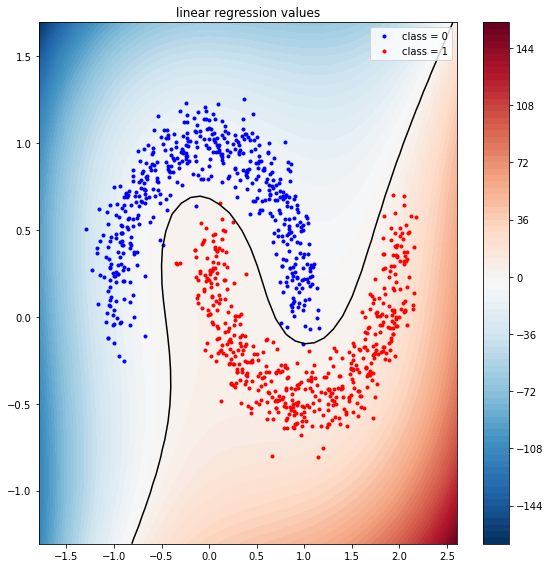

In [47]:
function_result_10()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [39]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    ZZ = sigmoid(theta1[0] + theta1[1] * XX + theta1[2] * YY + theta1[3] * XX**2 + theta1[4] * YY **2)
    #theta1[0] + theta1[1] * XX **2 + theta1[2] * YY**2
    #theta1[0] + theta1[1] * XX + theta1[2] * YY + theta1[3] * XX**2 + theta1[4] * XX * YY + theta1[5] * YY**2

    # ZZ[, ZZ[:-1, :-1].max()
    levels = ticker.MaxNLocator(nbins =100).tick_values(ZZ.min(), ZZ.max())
    #plt.pcolormesh(XX, YY, ZZ, cmap = plt.cm.RdBu_r, norm=norm)
    
    plt.contourf(XX, YY, ZZ, cmap = plt.cm.RdBu_r, levels=levels) # 색상 표시
    plt.colorbar()

    plt.plot(data1_point_x_class_0, data1_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, '.', color='red', label='class = 1')



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    #plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

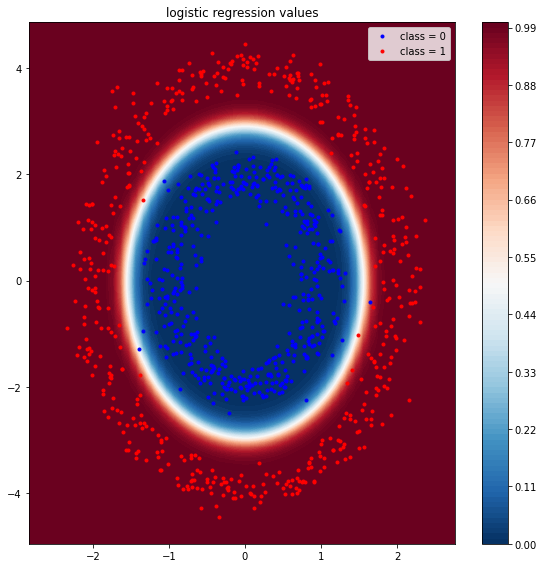

In [40]:
function_result_11()

np.ones(len(data2_point_x)),  data2_point_x * data2_point_y, data2_point_x**2, data2_point_x * data2_point_y**2, data2_point_x **3, data2_point_y**3))

In [44]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    ZZ = sigmoid(theta2[0] + theta2[1] * XX * YY + theta2[2] * XX**2 + theta2[3] * XX * YY **2 + theta2[4] *XX**3 + theta2[5] * YY**3)
    #sigmoid(theta2[0] + theta2[1] * XX + theta2[2] * YY + theta2[3] * XX**2 + theta2[4] * XX**3 + theta2[5] * YY**3)
    #sigmoid(theta2[0] + theta2[1] * XX + theta2[2] * YY + theta2[3] * XX**2 + theta2[4] * YY **2 + theta2[5] * XX**3 + theta2[6] * YY**3)


   
    levels = ticker.MaxNLocator(nbins =100).tick_values(ZZ.min(), ZZ.max())
    
    plt.contourf(XX, YY, ZZ, cmap = plt.cm.RdBu_r, levels=levels) # 색상 표시
    plt.colorbar()

    plt.plot(data2_point_x_class_0, data2_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, '.', color='red', label='class = 1')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    #plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

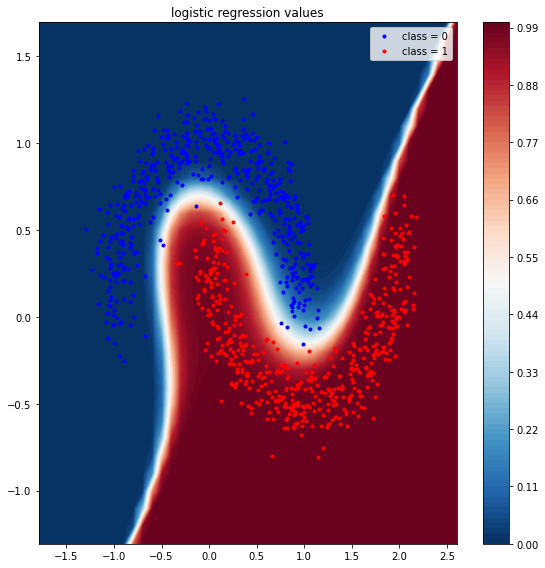

In [45]:
function_result_12()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.0070969284
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.0210510213
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9990000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9980000000
**************************************************
## [RESULT 05]
**************************************************


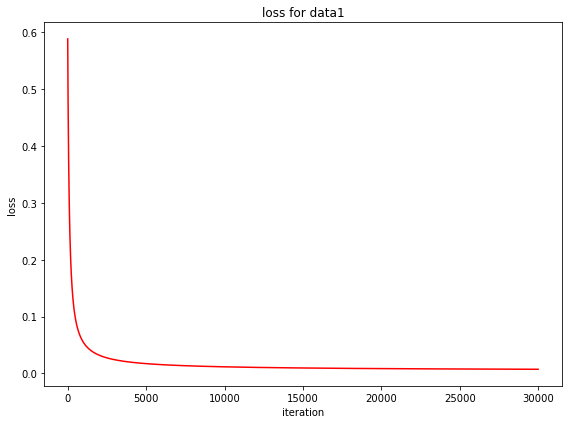

**************************************************
## [RESULT 06]
**************************************************


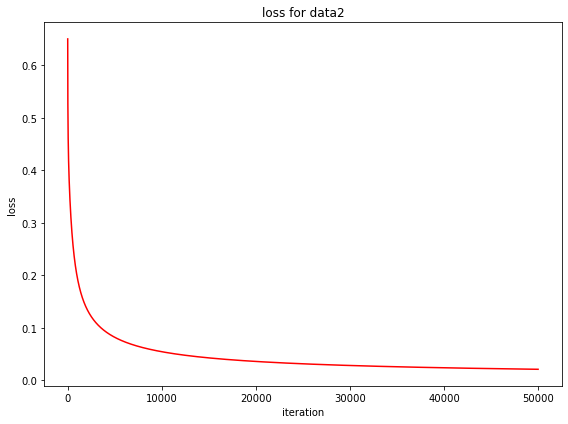

**************************************************
## [RESULT 07]
**************************************************


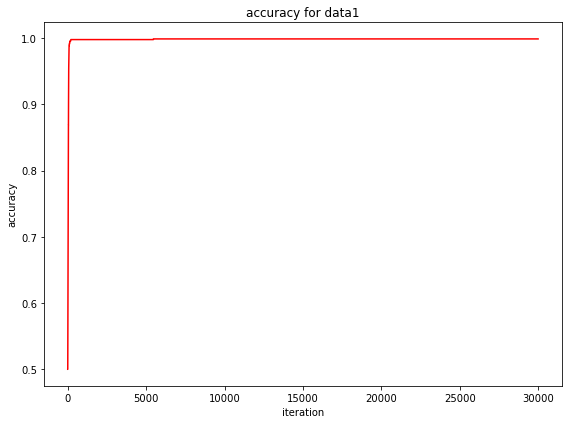

**************************************************
## [RESULT 08]
**************************************************


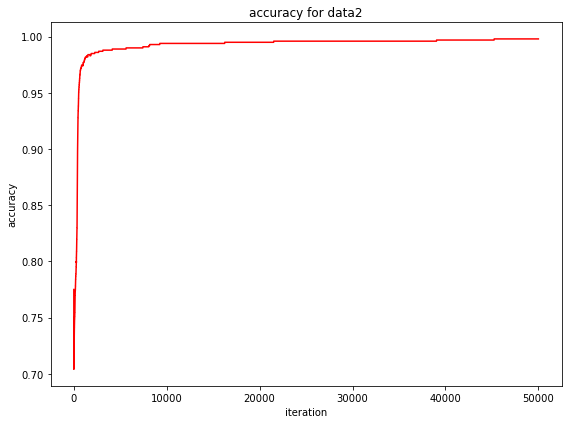

**************************************************
## [RESULT 09]
**************************************************


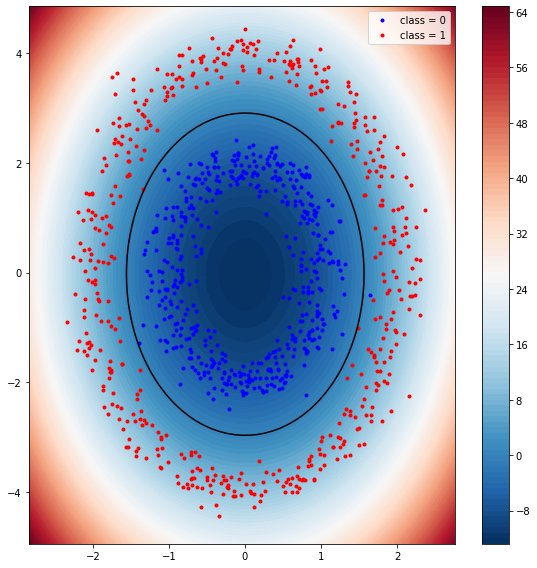

**************************************************
## [RESULT 10]
**************************************************


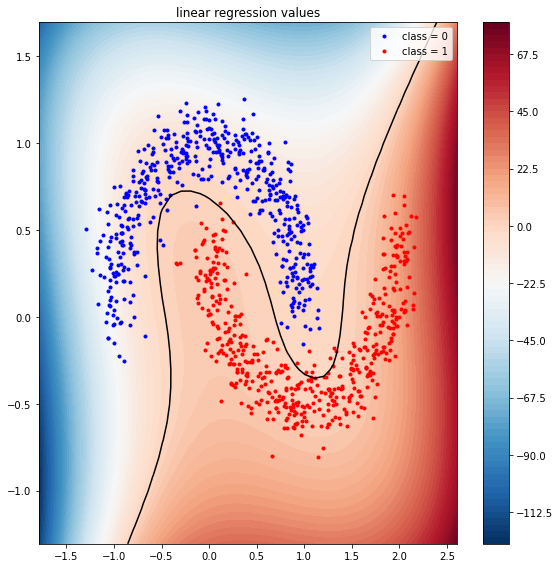

**************************************************
## [RESULT 11]
**************************************************


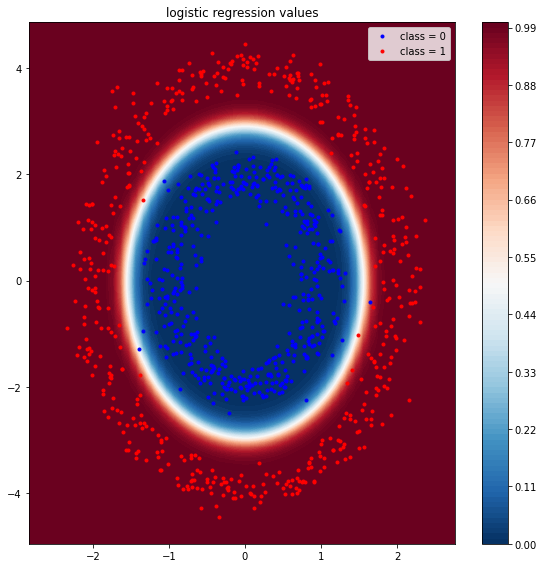

**************************************************
## [RESULT 12]
**************************************************


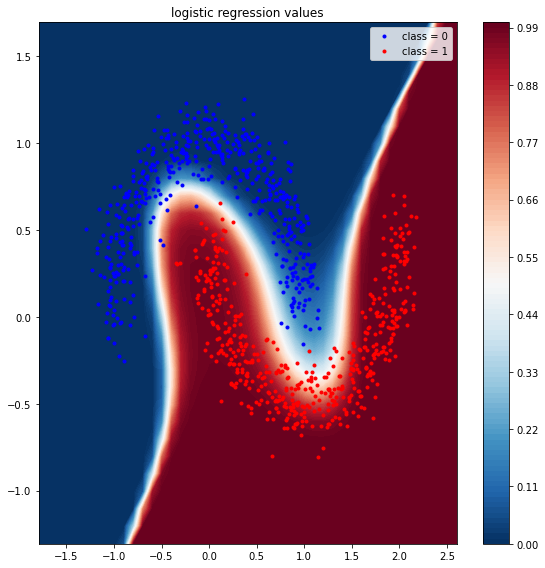

In [43]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)